### Rewriting code from RDA_type_seasonal.ipynb using some of the tricks I've learned

In [1]:
import itertools
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import time
import os

%matplotlib notebook

In [2]:
ferretpath = "/Users/Siwen/Desktop/ferret/bin"
rdapath = "APHRO_ZH_front_025deg_V1101."

In [3]:
## year = 2007
## ff = filename = ferretpath + '/' + rdapath + str(year) + '.nc'
## tst = nc.Dataset(ff, 'r')
## tst.variables

In [4]:
## start by loading all precipitation data for each year.
P = np.zeros((365,80,72,57))
P_band = np.zeros((365,80,72,57))
P_local = np.zeros((365,80,72,57))

for yr in range(1951,2008):
    
    #Build filename
    filename = ferretpath + '/' + rdapath + str(yr) + '.nc'
    print(filename),
    myf = nc.Dataset(filename, 'r')
    
    #Obtain fraction of different types of rainfall
    P[:,:,:,yr-1951] = myf['P'][:365,:,:]
    P_band[:,:,:,yr-1951] = myf['P_band1'][:365,:,:] + myf['P_band2'][:365,:,:]
    P_local[:,:,:,yr-1951] = myf['P_leftover'][:365,:,:]
    
    myf.close()

/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1951.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1952.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1953.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1954.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1955.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1956.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1957.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1958.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1959.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1960.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1961.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1962.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1963.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_025deg_V1101.1964.nc
/Users/Siwen/Desktop/ferret/bin/APHRO_ZH_front_0

In [50]:
## streamline the code below
def decadal_change(precip,season,y1,y2):
    p1 = np.sum(np.mean(precip[season[0]-1:season[1],:,:,y1[0]-1951:y1[1]-1950], axis = 3), axis = 0)
    p2 = np.sum(np.mean(precip[season[0]-1:season[1],:,:,y2[0]-1951:y2[1]-1950], axis = 3), axis = 0)
    return p2-p1

<IPython.core.display.Javascript object>


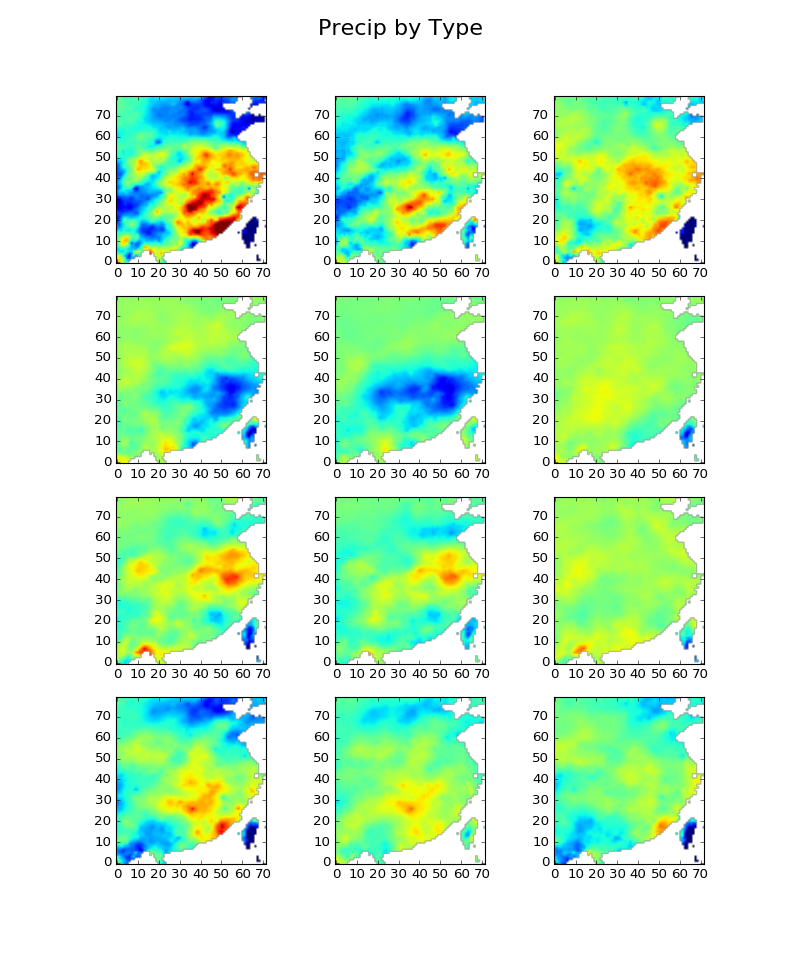

144.587289543
-687.224272494
[1, 365]
93.1327638471
-78.2687048375
[1, 365]
70.0832729702
-665.903006866
[1, 365]
42.7760782218
-98.2771131236
[121, 160]
34.1133228227
-85.1284140139
[121, 160]
32.2259981526
-89.2292515303
[121, 160]
78.406216784
-112.555592759
[161, 200]
61.9239222796
-61.8598455361
[161, 200]
61.8930912328
-74.7737046295
[161, 200]
86.1528178695
-234.168762699
[201, 273]
60.0059942828
-44.1121545207
[201, 273]
55.640699206
-223.863672042
[201, 273]


In [52]:
## PLOTTING - two 12-panel figures, one for 1980-2007 v 1951-1979, the other for 1994-2007 v 1980-1993.

## arrange for plotting below
P_tuple = [P, P_band, P_local]*4
seasons = itertools.chain.from_iterable([[[1,365]]*3,[[121,160]]*3,[[161,200]]*3,[[201,273]]*3])
years = [[[1951,1979],[1980,2007]],[[1980,1993],[1994,2007]]]


## create one big figure behind subpanels
fig, axes = plt.subplots(4,3,figsize=(10,12), facecolor='w')
st = plt.suptitle("Precip by Type", size = 20)

## lists of the characteristics for each subplot - what column is being plotted, title and labels.
#mets = ['M_1','M_2','M_3','M_4','M_5','M_6','M_7','M_8']
#titles = ["$M_1$ - Latitude of Max Rainfall","$M_2$ - Rainfall Centroid Lat","$M_3$ - Intensity of Max Rainfall",\
#          "$M_4$ - Mean All-China Rainfall","$M_5$ - Mean North China Rainfall","$M_6$ - Mean South China Rainfall",\
#          "$M_7$ - North China Rainfall Frequency","$M_8$ - South China Rainfall Frequency"]
#xlabels = ['','','','','','','Day of Year','Day of Year']
#ylabels = ["Latitude ($^{\circ}$)","Latitude ($^{\circ}$)","mm day$^{-1}$","mm day$^{-1}$","mm day$^{-1}$",\
#           "mm day$^{-1}$","Frequency","Frequency"]


## cycle through each set of axes and make correct plot
yr = years[0]

for ax, precip, season in zip(axes.reshape(-1), P_tuple, seasons):
    plt.sca(ax)
    dc = decadal_change(precip,season,yr[0],yr[1])
    print(np.nanmax(dc))
    print(np.nanmin(dc))
    print(season)
    plt.imshow(dc, origin = 'lower', vmax=100, vmin=-100)
#    ax.set_title(title, fontsize=16)
#    ax.set_xlabel(xlabel, fontsize=13, labelpad=0.5)
#    ax.set_ylabel(ylabel, fontsize=13, labelpad=0.5)

<IPython.core.display.Javascript object>


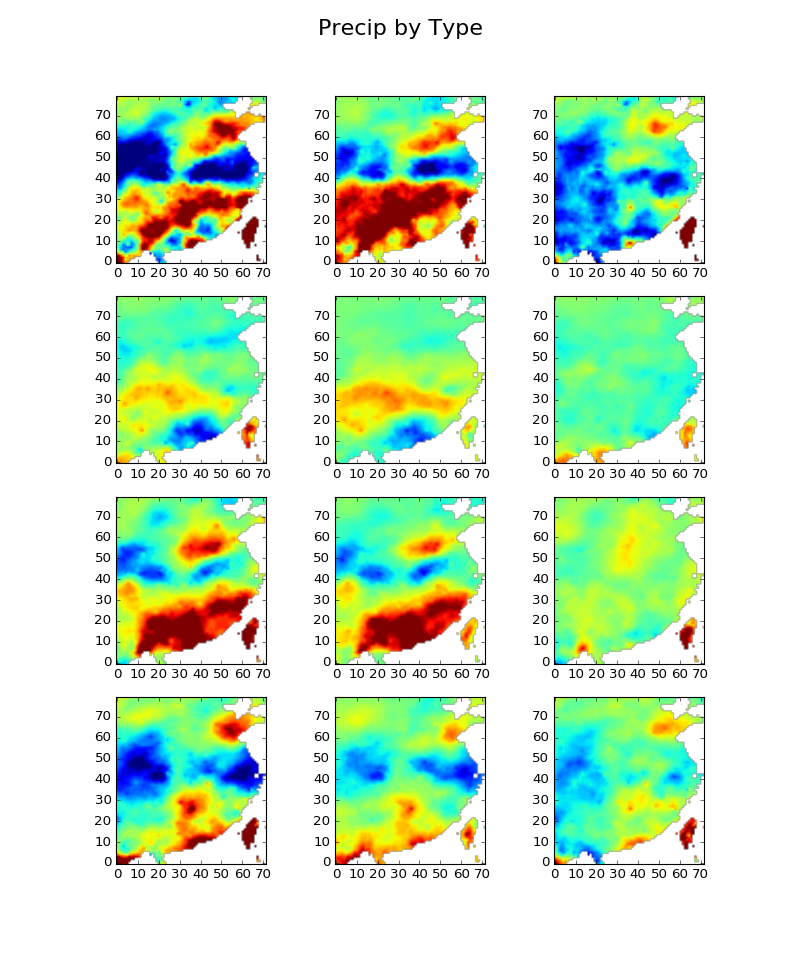

626.695939862
-207.968398927
[1, 365]
193.686226047
-131.114608829
[1, 365]
561.645986523
-109.837951419
[1, 365]
118.849355174
-93.9295643327
[121, 160]
68.4259170992
-71.3934351506
[121, 160]
74.1636370322
-40.7985839966
[121, 160]
267.089325299
-71.4731967531
[161, 200]
186.460332175
-81.6283486361
[161, 200]
186.626646046
-40.9489718402
[161, 200]
236.034993045
-125.634049675
[201, 273]
97.7739441071
-90.246240358
[201, 273]
149.304731306
-92.1774184956
[201, 273]


In [53]:
## PLOTTING - two 12-panel figures, one for 1980-2007 v 1951-1979, the other for 1994-2007 v 1980-1993.

## arrange for plotting below
P_tuple = [P, P_band, P_local]*4
seasons = itertools.chain.from_iterable([[[1,365]]*3,[[121,160]]*3,[[161,200]]*3,[[201,273]]*3])
years = [[[1951,1979],[1980,2007]],[[1980,1993],[1994,2007]]]


## create one big figure behind subpanels
fig, axes = plt.subplots(4,3,figsize=(10,12), facecolor='w')
st = plt.suptitle("Precip by Type", size = 20)

## lists of the characteristics for each subplot - what column is being plotted, title and labels.
#mets = ['M_1','M_2','M_3','M_4','M_5','M_6','M_7','M_8']
#titles = ["$M_1$ - Latitude of Max Rainfall","$M_2$ - Rainfall Centroid Lat","$M_3$ - Intensity of Max Rainfall",\
#          "$M_4$ - Mean All-China Rainfall","$M_5$ - Mean North China Rainfall","$M_6$ - Mean South China Rainfall",\
#          "$M_7$ - North China Rainfall Frequency","$M_8$ - South China Rainfall Frequency"]
#xlabels = ['','','','','','','Day of Year','Day of Year']
#ylabels = ["Latitude ($^{\circ}$)","Latitude ($^{\circ}$)","mm day$^{-1}$","mm day$^{-1}$","mm day$^{-1}$",\
#           "mm day$^{-1}$","Frequency","Frequency"]


## cycle through each set of axes and make correct plot
yr = years[1]

for ax, precip, season in zip(axes.reshape(-1), P_tuple, seasons):
    plt.sca(ax)
    dc = decadal_change(precip,season,yr[0],yr[1])
    print(np.nanmax(dc))
    print(np.nanmin(dc))
    print(season)
    plt.imshow(dc, origin = 'lower', vmax=100, vmin=-100)
#    ax.set_title(title, fontsize=16)
#    ax.set_xlabel(xlabel, fontsize=13, labelpad=0.5)
#    ax.set_ylabel(ylabel, fontsize=13, labelpad=0.5)

In [8]:
np.mean(P, axis=(0,3)).shape

(80, 72)

In [9]:
qq = np.mean(P[0:365,:,:,0:29], axis = (0,3))

In [10]:
qq.shape

(80, 72)

In [11]:
qq = decadal_change(P,[1,365],[1951,1979],[1980,2007])

In [12]:
qq.shape

(80, 72)

In [47]:
help(palette)

NameError: name 'palette' is not defined